In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mm
import seaborn as ss
credit_data=pd.read_csv("D:\\python course\\Internship\\dataset.csv")
credit_data

,Sno,Customer,Age,City,Credit_Type,Limit,Company,Segment
0,1,A1,1,BANGALORE,Gold,"INR 500,000.00",C1,Self Employed
1,2,A2,36,CALCUTTA,Silver,"INR 100,000.00",C2,Salaried_MNC
2,3,A3,12,COCHIN,Platimum,"INR 10,000.00",C3,Salaried_Pvt
3,4,A4,46,BOMBAY,Platimum,"INR 10,001.00",C4,Govt
4,5,A5,70,BANGALORE,Platimum,"INR 10,002.00",C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,30,CHENNAI,Silver,"INR 100,000.00",C19,Salaried_Pvt
96,97,A97,21,TRIVANDRUM,Platimum,"INR 10,000.00",C20,Govt
97,98,A98,41,CALCUTTA,Platimum,"INR 10,001.00",C21,Normal Salary
98,99,A99,22,CALCUTTA,Platimum,"INR 10,002.00",C22,Self Employed


In [2]:
credit_data.isnull().sum()# No missing data

Sno            0
Customer       0
Age            0
City           0
Credit_Type    0
Limit          0
Company        0
Segment        0
dtype: int64

In [3]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sno          100 non-null    int64 
 1   Customer     100 non-null    object
 2   Age          100 non-null    int64 
 3   City         100 non-null    object
 4   Credit_Type  100 non-null    object
 5   Limit        100 non-null    object
 6   Company      100 non-null    object
 7   Segment      100 non-null    object
dtypes: int64(2), object(6)
memory usage: 6.4+ KB


# Basic Analysis

In [4]:
#Limit is of string type or Object due to INR (consideres as string) so i will remove INR
credit_data['Limit'] = credit_data['Limit'].astype(str)
credit_data['Limit'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100 entries, 0 to 99
Series name: Limit
Non-Null Count  Dtype 
--------------  ----- 
100 non-null    object
dtypes: object(1)
memory usage: 932.0+ bytes


In [5]:
def clean_Limit_type(x):
    x = str(x).replace("INR","").replace(",","").strip()
    return float(x)

credit_data['Limit'] = credit_data['Limit'].apply(clean_Limit_type)
credit_data

,Sno,Customer,Age,City,Credit_Type,Limit,Company,Segment
0,1,A1,1,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,36,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,12,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,46,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,70,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,30,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,21,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,41,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,22,CALCUTTA,Platimum,10002.0,C22,Self Employed


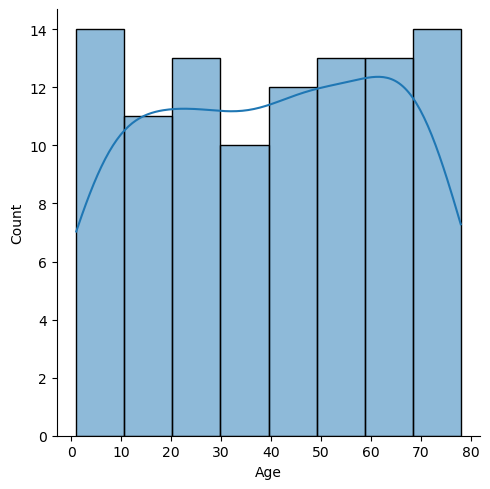

In [6]:
#Checking age distribution
print(ss.displot(credit_data,x='Age',kind='hist',kde=True))

In [7]:
#checking outliers if yes then replacing it 
def check_age(x):
    if x>=18:
        return x
    else:
        return np.nan
credit_data['Age']=credit_data['Age'].apply(check_age)
credit_data

,Sno,Customer,Age,City,Credit_Type,Limit,Company,Segment
0,1,A1,NaN,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,36.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,NaN,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,46.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,70.0,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,30.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,21.0,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,41.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,22.0,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [8]:
print(credit_data['Age'].mean())
print(credit_data['Age'].median())# both will be suitable for filling the missing data

49.294871794871796
50.5


In [9]:
credit_data['Age'].fillna(int(credit_data['Age'].mean()), inplace=True)
credit_data.sample(5)

C:\Users\piyus\AppData\Local\Temp\ipykernel_8212\1718928090.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit_data['Age'].fillna(int(credit_data['Age'].mean()), inplace=True)


,Sno,Customer,Age,City,Credit_Type,Limit,Company,Segment
35,36,A36,69.0,BOMBAY,Platimum,100002.0,C18,Normal Salary
60,61,A61,44.0,COCHIN,Gold,500000.0,C23,Govt
21,22,A22,37.0,BOMBAY,Silver,100000.0,C22,Self Employed
75,76,A76,68.0,BANGALORE,Silver,500000.0,C38,Self Employed
5,6,A6,36.0,DELHI,Silver,100000.0,C6,Self Employed


In [10]:
print(credit_data['City'].unique())
print(credit_data['Credit_Type'].unique())

['BANGALORE' 'CALCUTTA' 'COCHIN' 'BOMBAY' 'DELHI' 'PATNA' 'CHENNAI'
 'TRIVANDRUM']
['Gold' 'Silver' 'Platimum']


# Grouped Analysis

In [11]:
group_cityuse=credit_data.groupby("City")["Credit_Type"].value_counts()
group_cityuse

City        Credit_Type
BANGALORE   Gold           9
            Silver         6
            Platimum       4
BOMBAY      Platimum       6
            Gold           5
            Silver         3
CALCUTTA    Platimum       7
            Gold           6
            Silver         5
CHENNAI     Platimum       3
            Silver         3
            Gold           2
COCHIN      Gold           8
            Platimum       7
            Silver         5
DELHI       Gold           4
            Silver         2
            Platimum       1
PATNA       Gold           3
            Silver         3
            Platimum       1
TRIVANDRUM  Platimum       3
            Silver         3
            Gold           1
Name: count, dtype: int64

In [12]:
credit_value=credit_data['Credit_Type'].value_counts()
print(credit_value)
credit_label=credit_data['Credit_Type'].unique()

Credit_Type
Gold        38
Platimum    32
Silver      30
Name: count, dtype: int64


In [13]:
print(credit_value.index)
print(credit_value.values)

Index(['Gold', 'Platimum', 'Silver'], dtype='object', name='Credit_Type')
[38 32 30]


C:\Users\piyus\AppData\Local\Temp\ipykernel_8212\3378556300.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ss.barplot(x=credit_value.index,y=credit_value.values,palette='Set2')


<Axes: title={'center': 'Customer by Credit type'}, xlabel='Credit_Type', ylabel='Customer Count'>

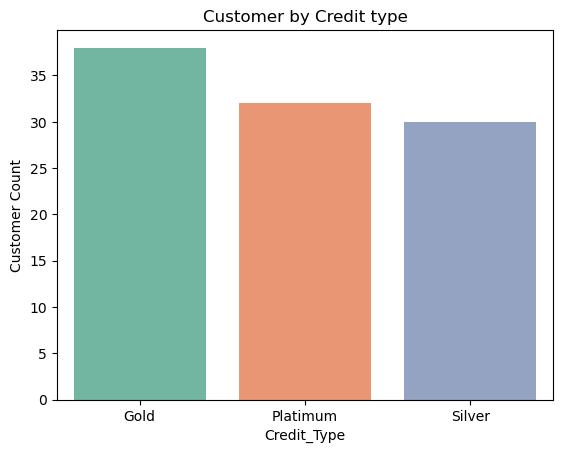

In [14]:
mm.title("Customer by Credit type")
mm.xlabel("Credit_Type")
mm.ylabel("Customer Count")
ss.barplot(x=credit_value.index,y=credit_value.values,palette='Set2')

# Customer Distribution By Segment

In [15]:
print(credit_data['Segment'].value_counts())

Segment
Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: count, dtype: int64


In [16]:
segment_label=credit_data['Segment'].value_counts().index
segment_value=credit_data['Segment'].value_counts().values
print(segment_label)
print(segment_value)

Index(['Govt', 'Self Employed', 'Normal Salary', 'Salaried_MNC',
       'Salaried_Pvt'],
      dtype='object', name='Segment')
[29 23 22 13 13]


([<matplotlib.patches.Wedge object at 0x0000020D979061E0>, <matplotlib.patches.Wedge object at 0x0000020D97963E00>, <matplotlib.patches.Wedge object at 0x0000020D98359CD0>, <matplotlib.patches.Wedge object at 0x0000020D9835A300>, <matplotlib.patches.Wedge object at 0x0000020D9835A900>], [Text(0.6741977818040066, 0.8691704959388332, 'Govt'), Text(-0.9097886073887849, 0.6182917514131784, 'Self Employed'), Text(-0.7530018405458982, -0.8018654676031945, 'Normal Salary'), Text(0.3726116618814165, -1.0349688639905885, 'Salaried_MNC'), Text(1.0095300538946657, -0.4368627590942418, 'Salaried_Pvt')], [Text(0.3677442446203672, 0.47409299778481806, '29.0%'), Text(-0.4962483313029735, 0.33725004622537, '23.0%'), Text(-0.41072827666139905, -0.43738116414719697, '22.0%'), Text(0.20324272466259077, -0.5645284712675936, '13.0%'), Text(0.5506527566698176, -0.23828877768776824, '13.0%')])


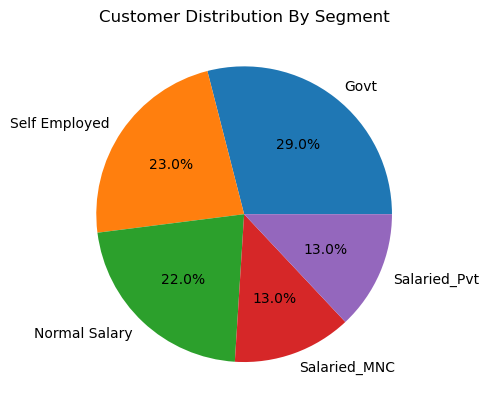

In [17]:
mm.title("Customer Distribution By Segment")
print(mm.pie(x=segment_value,labels=segment_label,shadow=False,autopct="%1.1f%%"))

# Distribution of Credit Limit 

Axes(0.125,0.11;0.775x0.77)


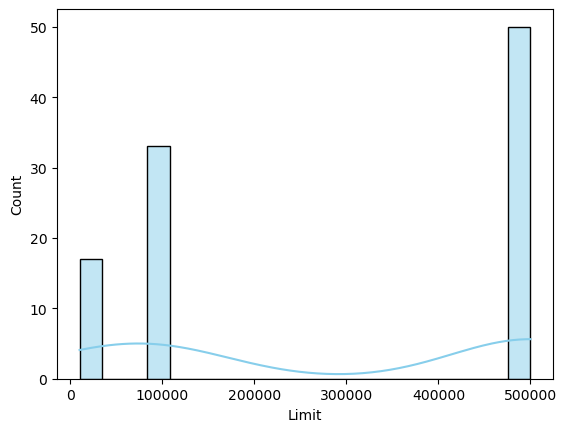

In [18]:
print(ss.histplot(data=credit_data, x='Limit', bins=20, kde=True, color='skyblue'))

# Boxplot Age by Segment

C:\Users\piyus\AppData\Local\Temp\ipykernel_8212\33072441.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ss.boxplot(credit_data,x='Segment',y='Age',palette='Set2')


<Axes: xlabel='Segment', ylabel='Age'>

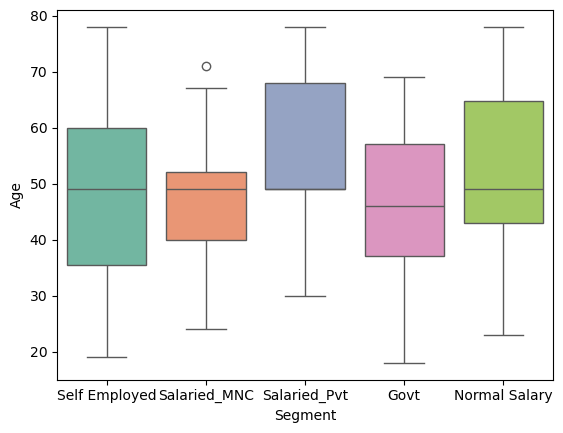

In [19]:
ss.boxplot(credit_data,x='Segment',y='Age',palette='Set2')

# Final Visualization for overall data

C:\Users\piyus\AppData\Local\Temp\ipykernel_8212\2141838352.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ss.boxplot(data=credit_data, x='Segment', y='Age', palette='Set2')


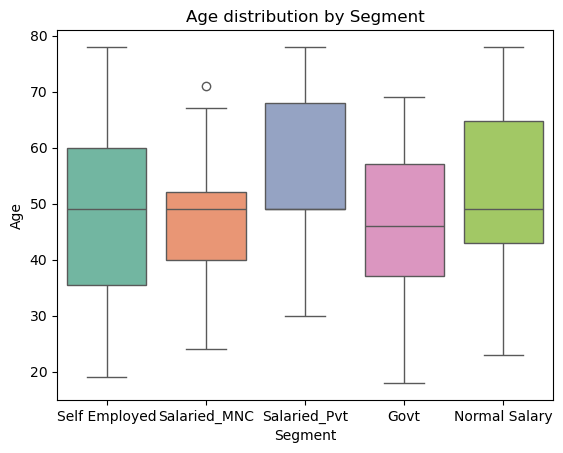

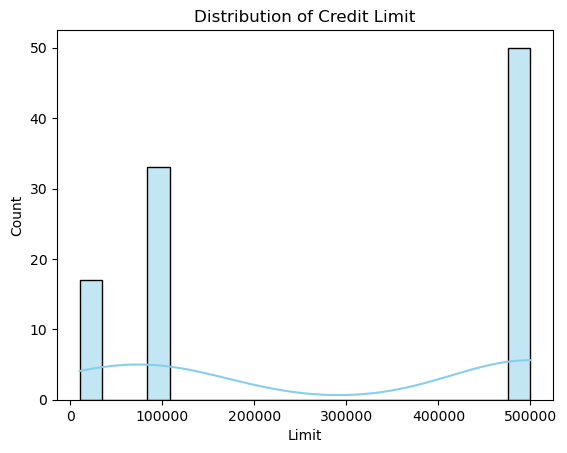

Segment Labels: Index(['Govt', 'Self Employed', 'Normal Salary', 'Salaried_MNC',
       'Salaried_Pvt'],
      dtype='object', name='Segment')
Segment Values: [29 23 22 13 13]


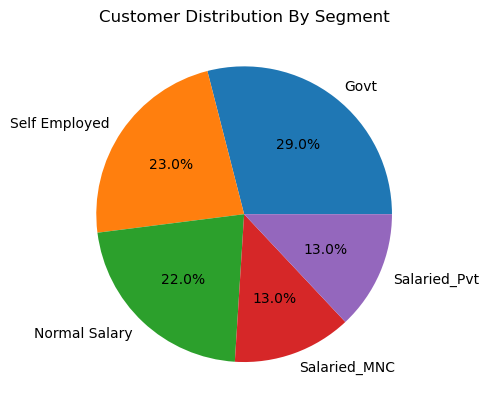

C:\Users\piyus\AppData\Local\Temp\ipykernel_8212\2141838352.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ss.barplot(x=credit_value.index, y=credit_value.values, palette='Set2')


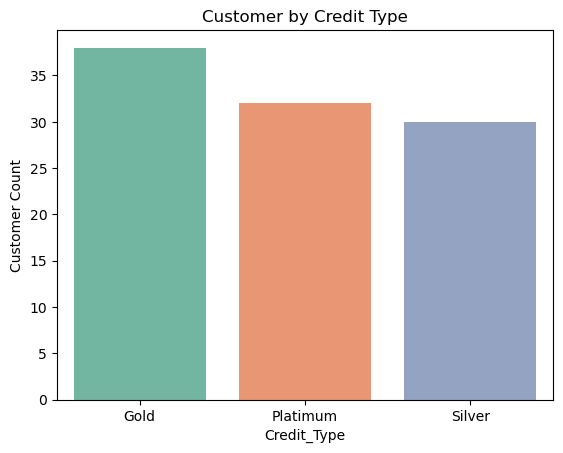

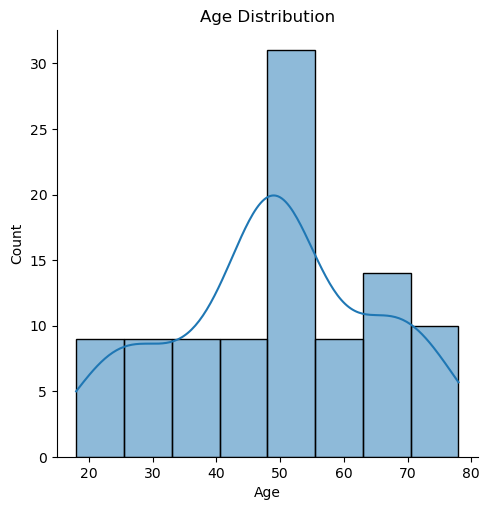

In [24]:
#1 Boxplot of Age by Segment
ss.boxplot(data=credit_data, x='Segment', y='Age', palette='Set2')
mm.title("Age distribution by Segment")
mm.show()

#2 Histogram of Limit
ss.histplot(data=credit_data, x='Limit', bins=20, kde=True, color='skyblue')
mm.title("Distribution of Credit Limit")
mm.show()

#3 Segment counts
segment_label = credit_data['Segment'].value_counts().index
segment_value = credit_data['Segment'].value_counts().values
print("Segment Labels:", segment_label)
print("Segment Values:", segment_value)
mm.pie(x=segment_value,labels=segment_label,shadow=False,autopct="%1.1f%%")
mm.title("Customer Distribution By Segment")
mm.show()

#4.Barplot of credit_value (assuming credit_value is defined)
ss.barplot(x=credit_value.index, y=credit_value.values, palette='Set2')
mm.title("Customer by Credit Type")
mm.xlabel("Credit_Type")
mm.ylabel("Customer Count")
mm.show()

#5 Displot of Age
ss.displot(credit_data['Age'], kind='hist', kde=True)
mm.title("Age Distribution")
mm.show()